In [410]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle


## Exporting the data path from the files

In [411]:
data_path = Path.cwd().parent / 'data' / 'raw' / 'Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)

In [412]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [413]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [415]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [416]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [417]:
df.shape

(7043, 21)

In [418]:
df=df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [419]:
num_cols=['tenure','MonthlyCharges','TotalCharges',]
for i in df.columns:
    if i not in num_cols:  
        print(df[i].unique())
        print('-'*20)

['Female' 'Male']
--------------------
[0 1]
--------------------
['Yes' 'No']
--------------------
['No' 'Yes']
--------------------
['No' 'Yes']
--------------------
['No phone service' 'No' 'Yes']
--------------------
['DSL' 'Fiber optic' 'No']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['Yes' 'No' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['No' 'Yes' 'No internet service']
--------------------
['Month-to-month' 'One year' 'Two year']
--------------------
['Yes' 'No']
--------------------
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------
['No' 'Yes']
--------------------


In [420]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [422]:
df.TotalCharges=df.TotalCharges.replace(' ',0)

In [423]:
df.TotalCharges=df.TotalCharges.astype('float64')

In [424]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### cleaning overview
missing values in total charge was replaced with 0

customer id was removed 

class imbalance detected in the target


# EDA

In [425]:
df.shape

(7043, 20)

In [426]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


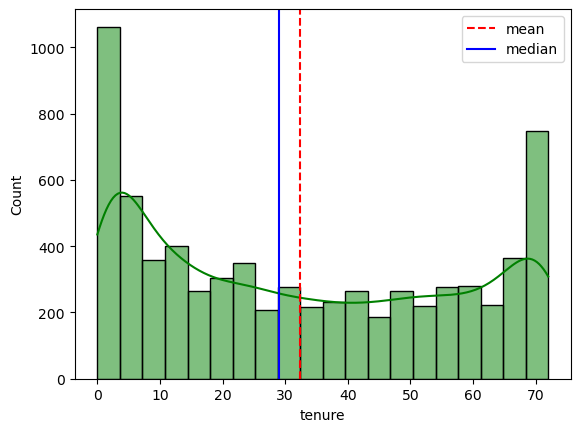

In [427]:
sns.histplot(df['tenure'],kde=True,bins=20,color='green')
mean=df['tenure'].mean()
median=df['tenure'].median()
plt.axvline([mean],color='red',linestyle='dashed',label='mean')
plt.axvline([median],color='blue',label='median')
plt.legend()

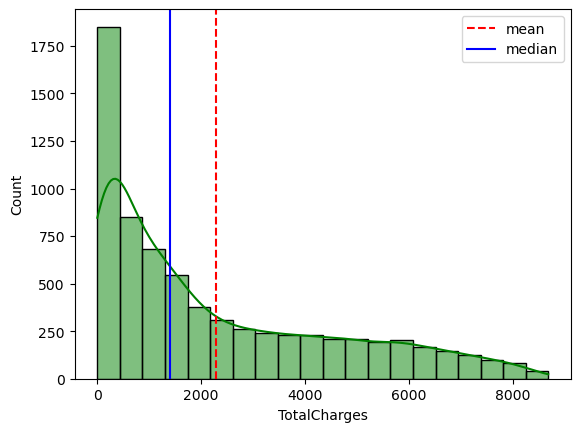

In [428]:
sns.histplot(df['TotalCharges'],kde=True,bins=20,color='green')
mean=df['TotalCharges'].mean()
median=df['TotalCharges'].median()
plt.axvline([mean],color='red',linestyle='dashed',label='mean')
plt.axvline([median],color='blue',label='median')
plt.legend()

<Axes: >

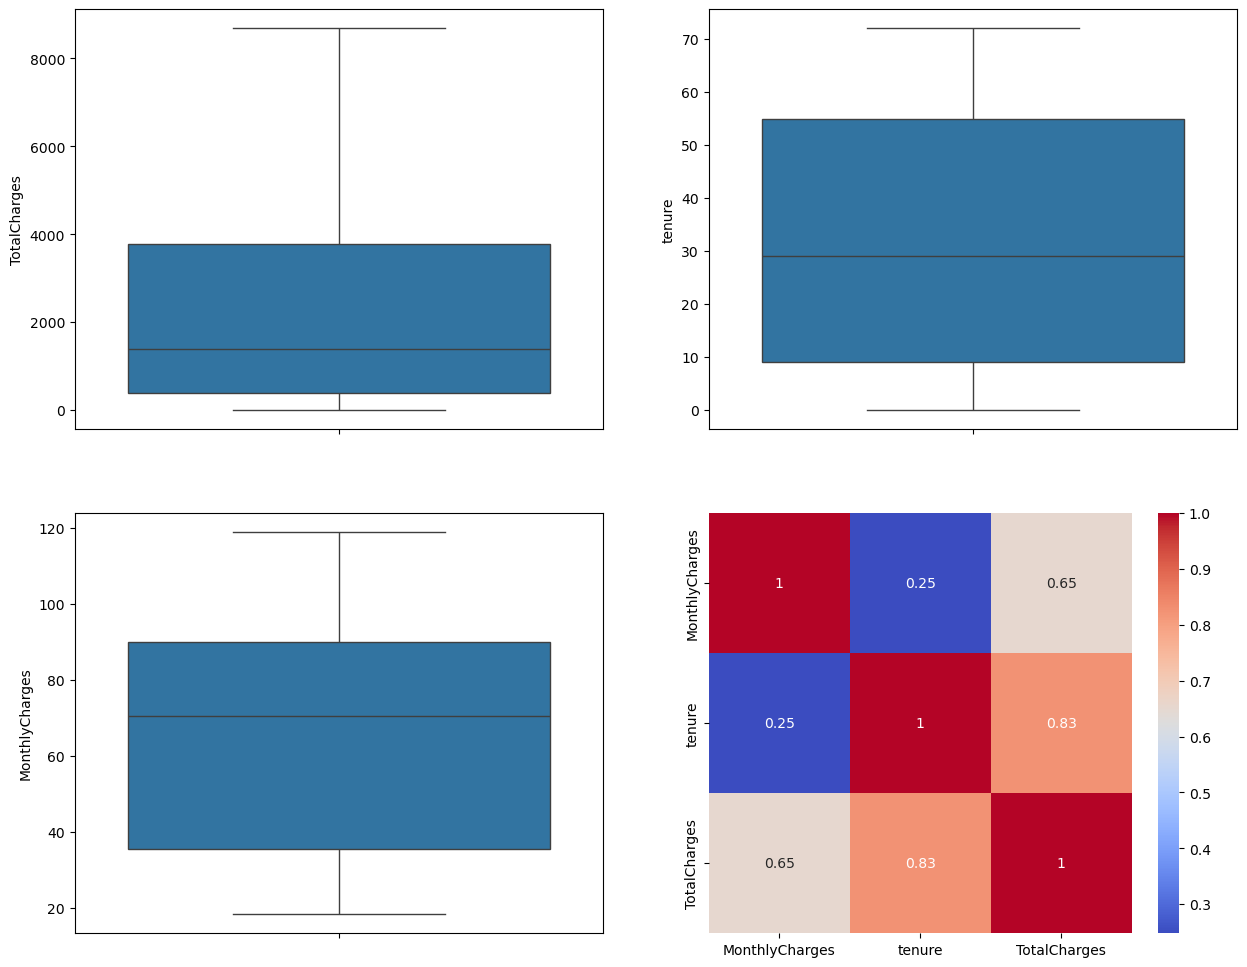

In [429]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
sns.boxplot(y=df['TotalCharges'], ax=axes[0,0])
sns.boxplot(y=df['tenure'], ax=axes[0,1])
sns.boxplot(y=df['MonthlyCharges'], ax=axes[1,0])
sns.heatmap(df[['MonthlyCharges','tenure','TotalCharges']].corr(),annot=True,cmap='coolwarm',ax=axes[1,1])



In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [431]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [432]:
obj_columns=df.select_dtypes(include='object').columns.to_list()
obj_columns=obj_columns+['SeniorCitizen']

In [433]:
len(obj_columns)

17

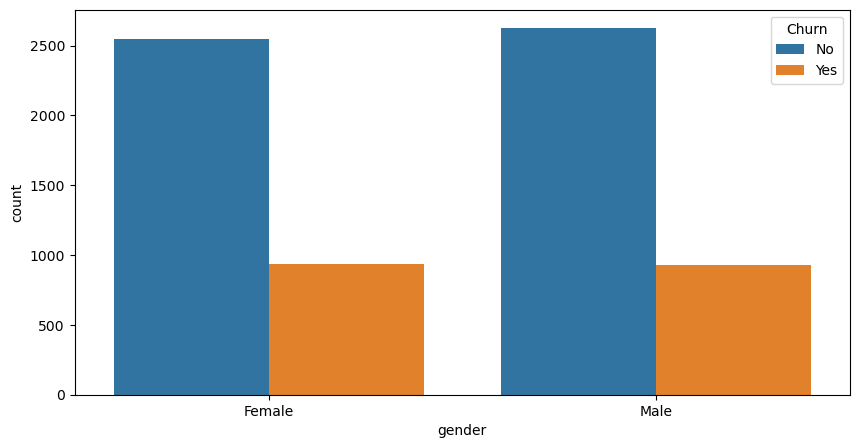

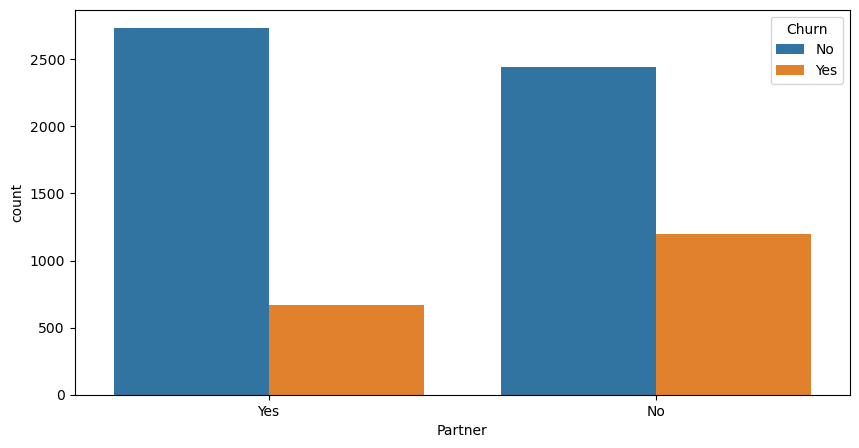

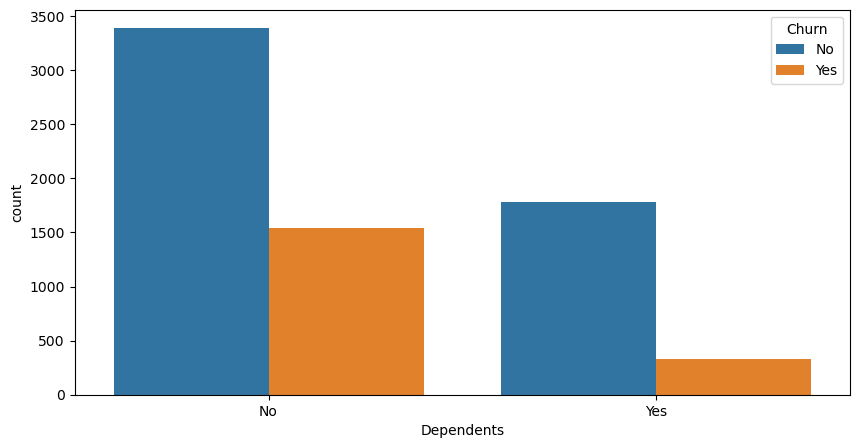

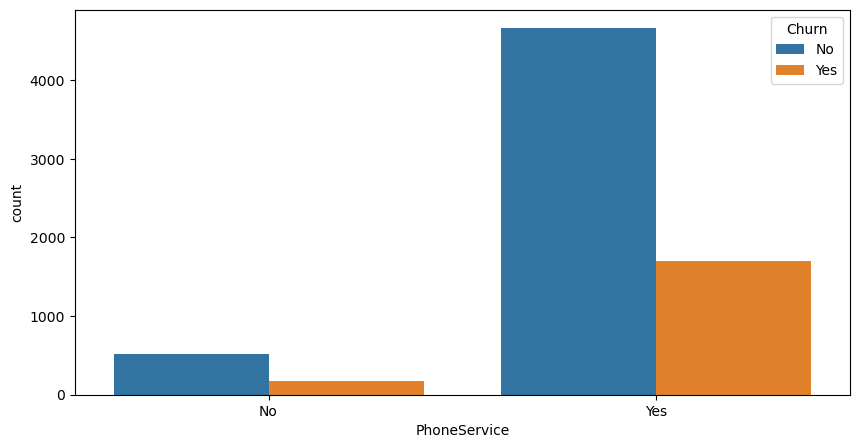

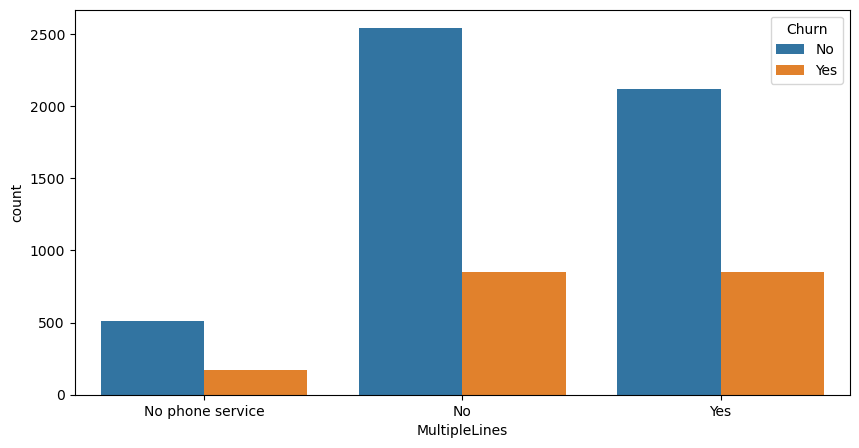

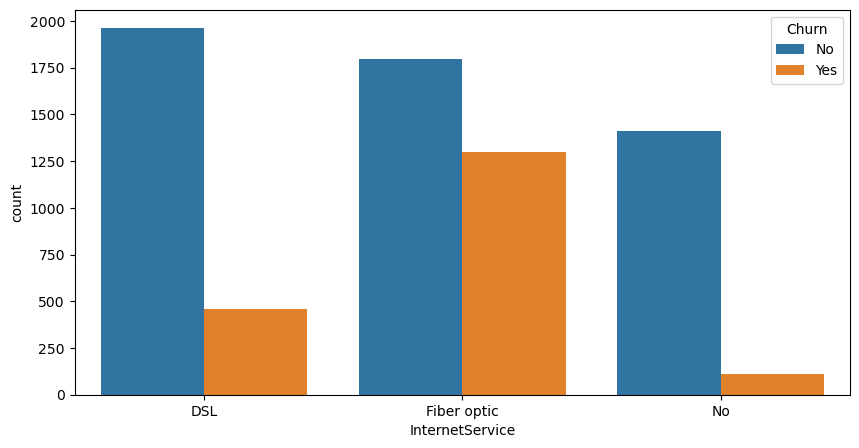

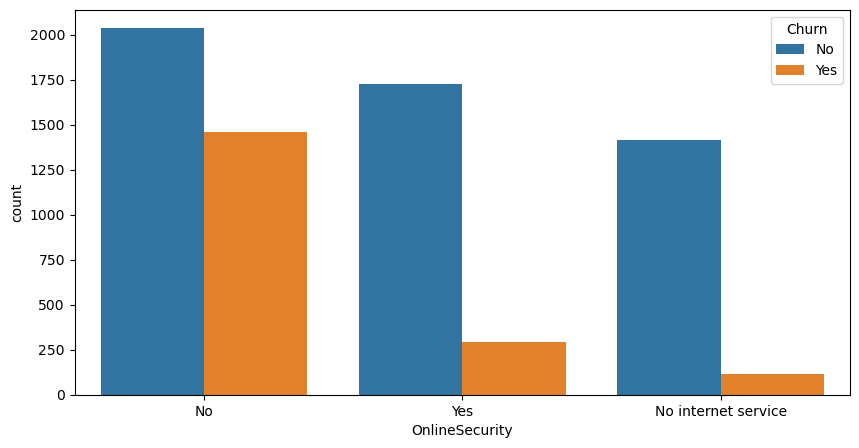

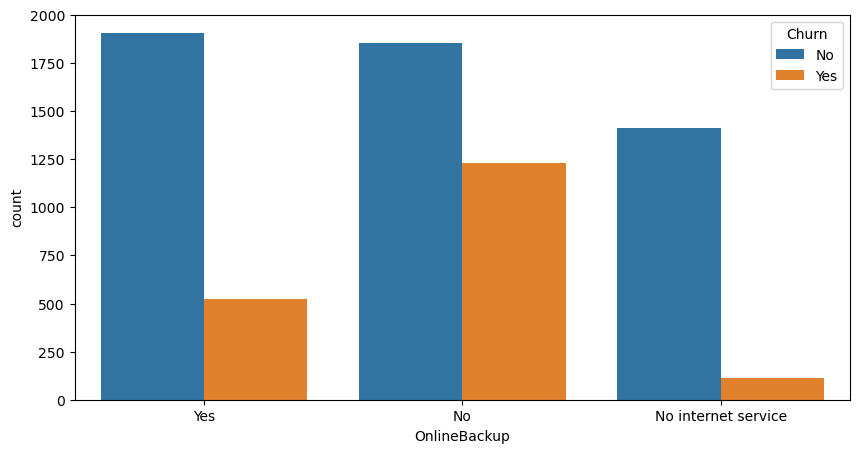

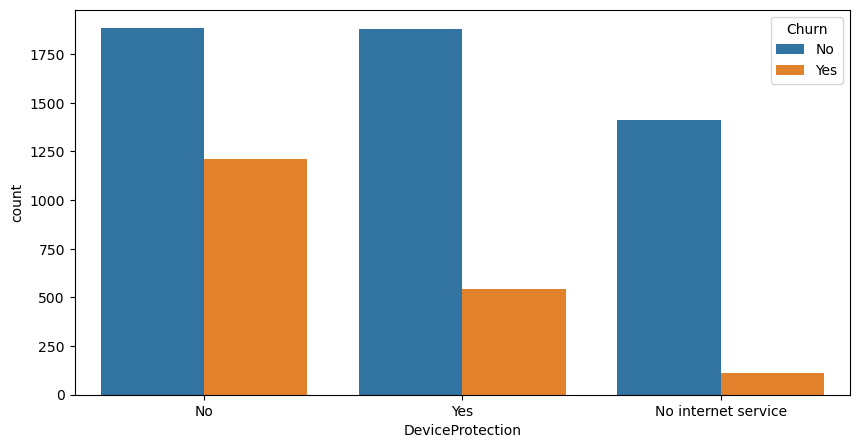

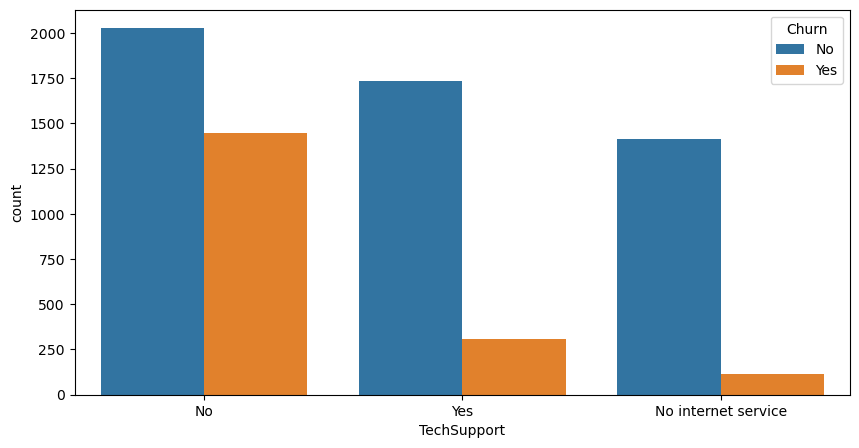

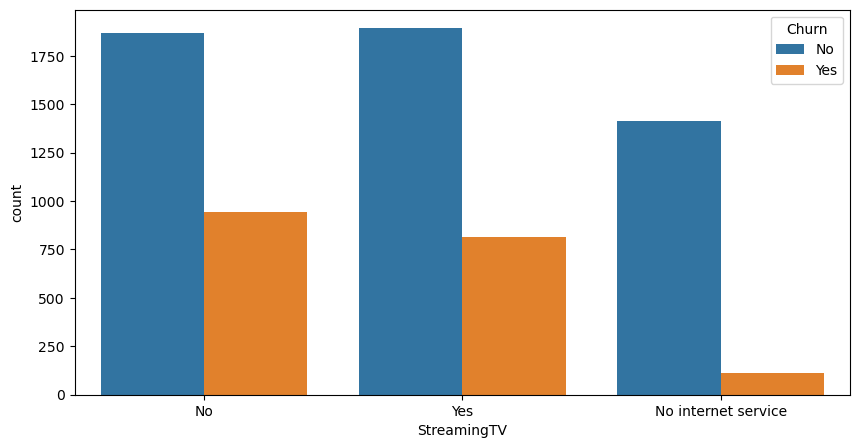

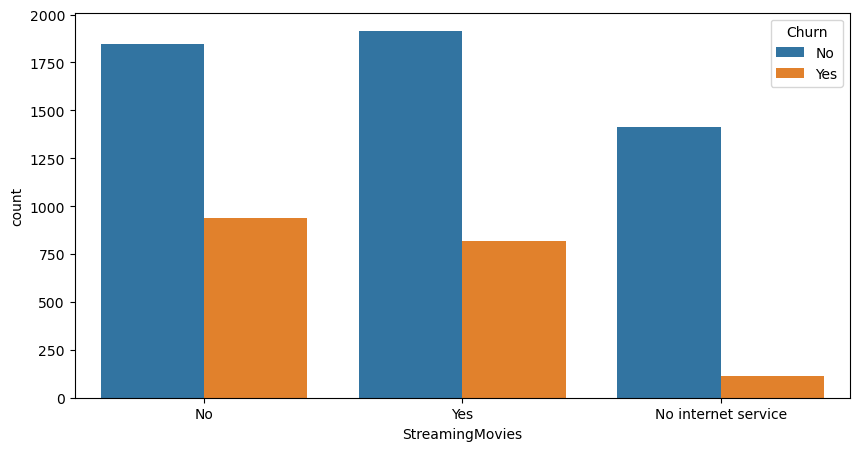

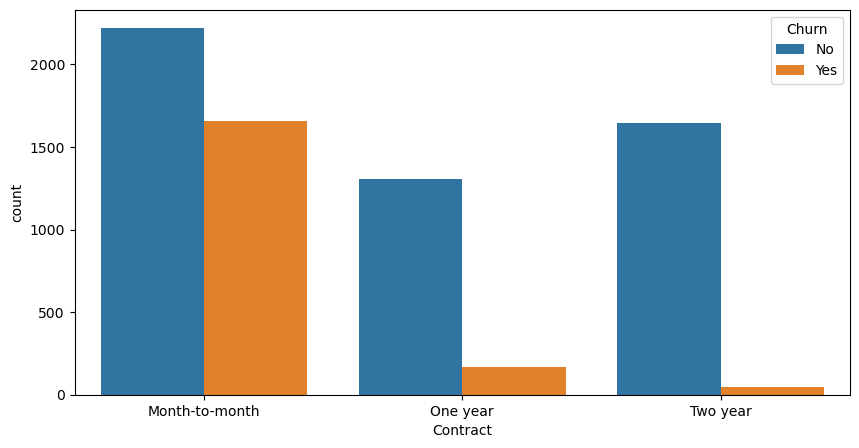

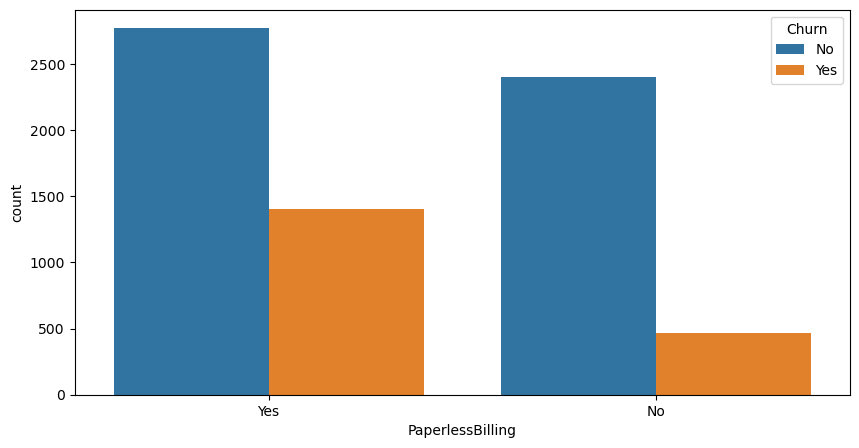

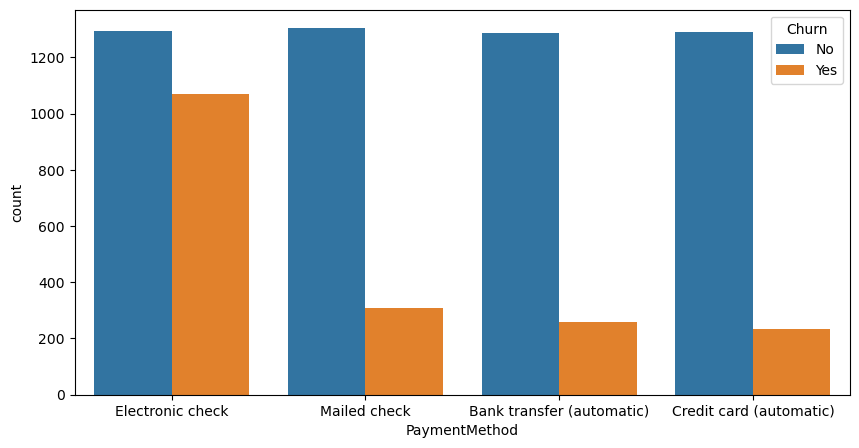

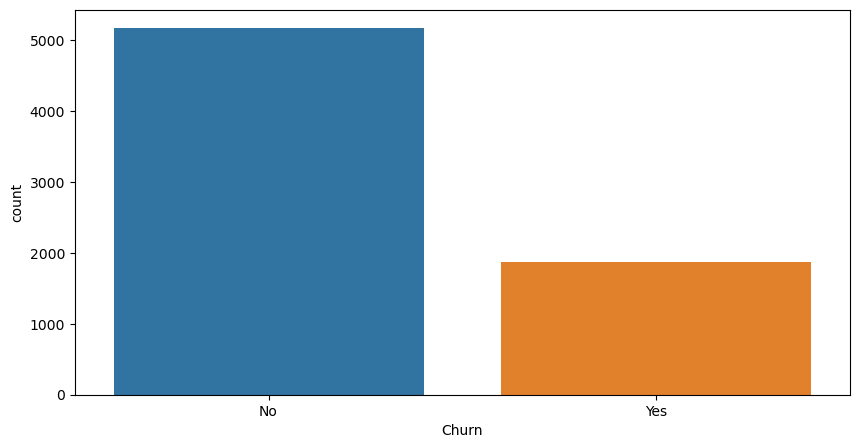

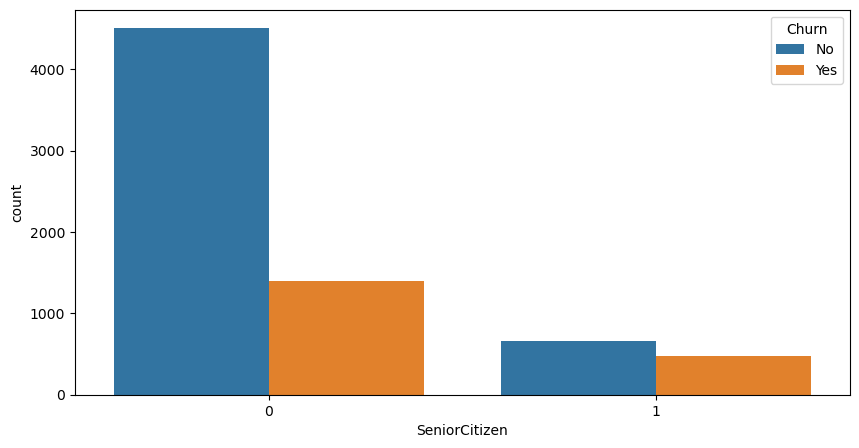

In [434]:
for i in obj_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Churn',data=df)

# Data Preprocessing

In [435]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


label encoding on categorical values


In [436]:
obj_columns=df.select_dtypes(include='object').columns.to_list()

In [437]:
encoder_col={}
for i in obj_columns:
    encoder=LabelEncoder()
    df[i]=encoder.fit_transform(df[i])
    encoder_col[i]=encoder


In [438]:
encoder_col

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

<Axes: >

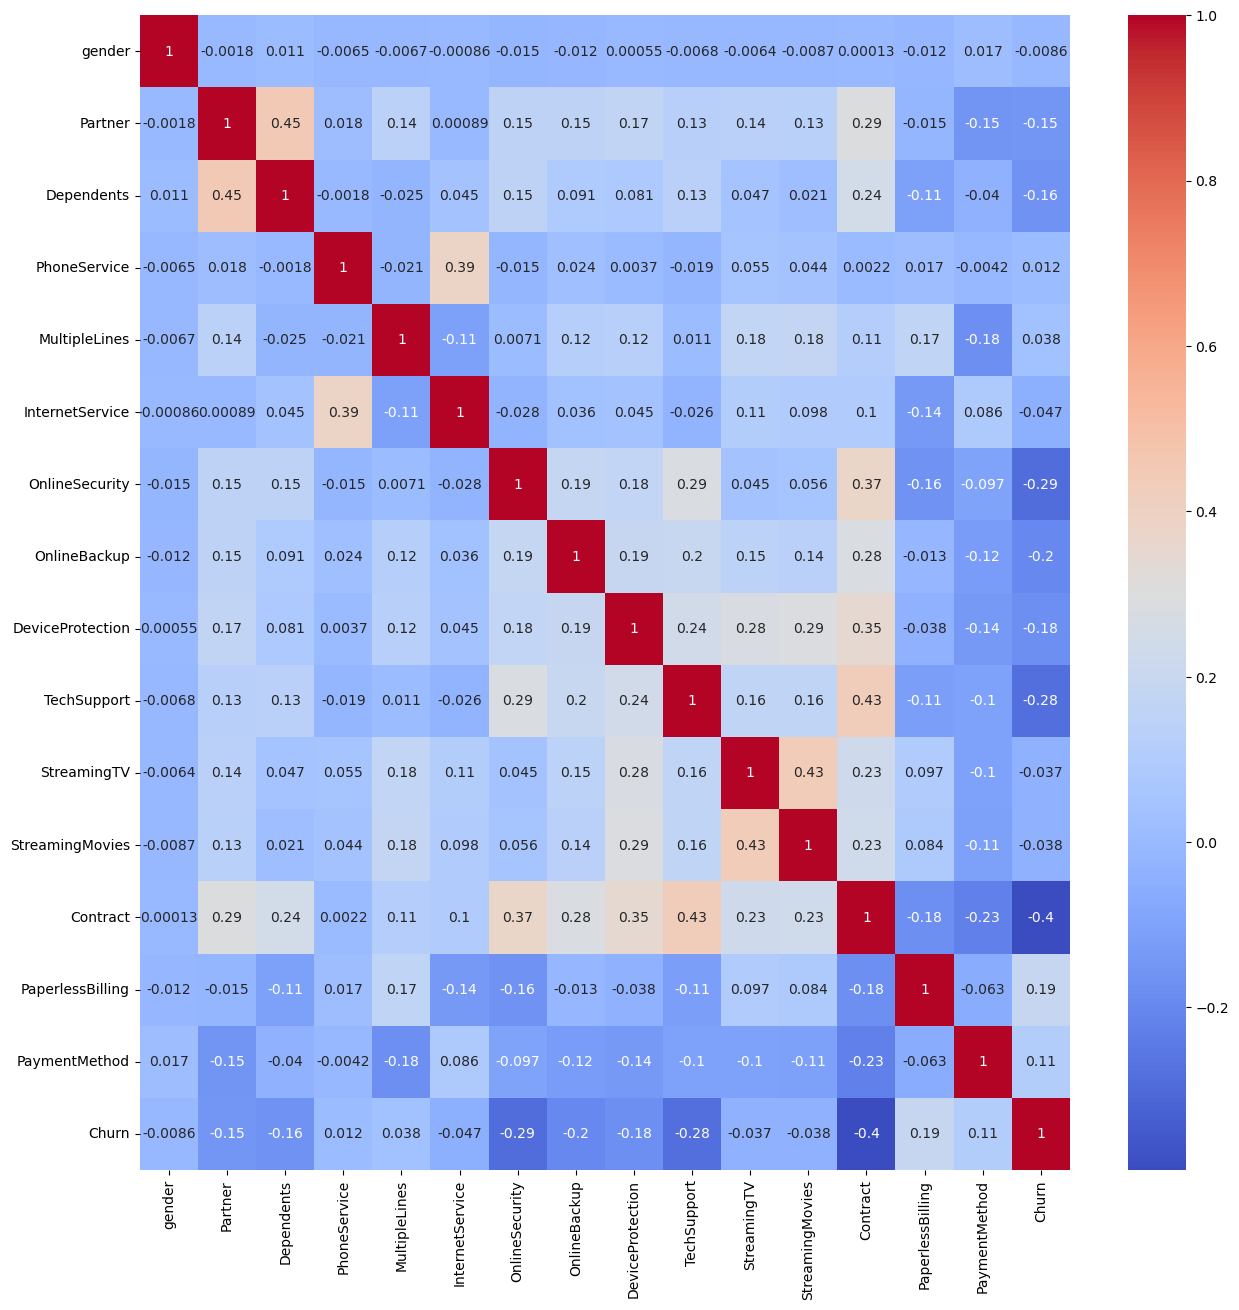

In [439]:
plt.figure(figsize=(15,15))
sns.heatmap(df[obj_columns].corr(),annot=True,cmap='coolwarm',)

In [440]:
corr_rank = df.corr(numeric_only=True)['Churn'].abs().sort_values(ascending=False)
print(corr_rank)

Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.198324
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


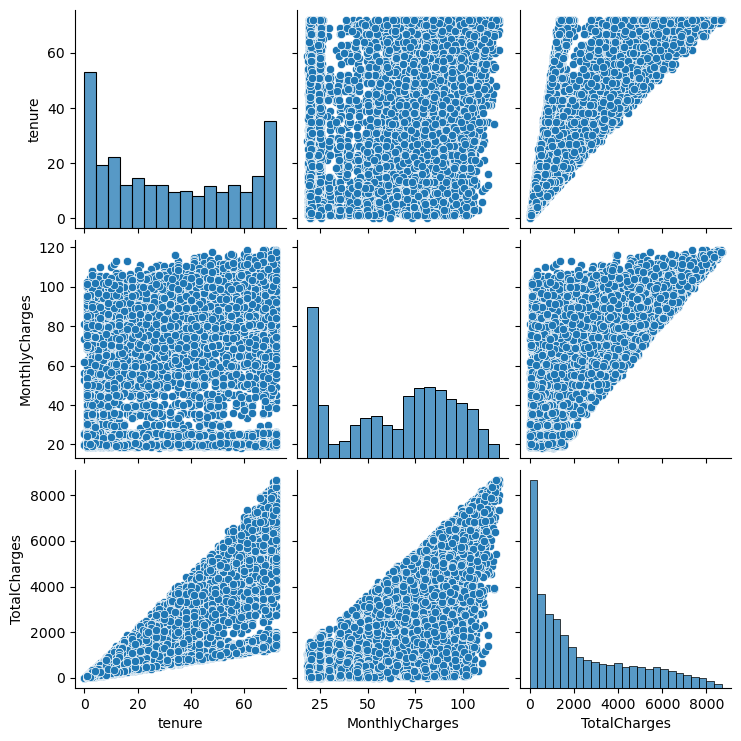

In [441]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges']])

In [442]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


saving to processed file

In [443]:
df.gender.value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

In [444]:
path=Path.cwd().parent/'data'/'processed'
df.to_csv(path/'preprocessed.csv',index=False)

### Train and test split

In [445]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [446]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [447]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [448]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [449]:
smote=SMOTE(random_state=42)

In [450]:
x_train,y_train=smote.fit_resample(x_train,y_train)
y_train.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

## Model Training

In [451]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale = neg / pos
models={
    'Logistic Regression':LogisticRegression(random_state=42,max_iter=3000),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(   random_state=42,
    n_estimators=200,
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10),

    'XGBoost':XGBClassifier(random_state=42,
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale,  
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss')
}

In [452]:
cv_scores={}
for name,model in models.items():
    print(f"Training {name}")
    scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores[name]=scores
    print(f"Model:{name} Cross_Validation_Accuracy: {np.mean(scores)}")
    print('-'*50)


Training Logistic Regression
Model:Logistic Regression Cross_Validation_Accuracy: 0.7700586715705591
--------------------------------------------------
Training Decision Tree
Model:Decision Tree Cross_Validation_Accuracy: 0.7891569975334588
--------------------------------------------------
Training Random Forest
Model:Random Forest Cross_Validation_Accuracy: 0.8269762978530876
--------------------------------------------------
Training XGBoost
Model:XGBoost Cross_Validation_Accuracy: 0.8374933228249924
--------------------------------------------------


In [453]:
cv_scores

{'Logistic Regression': array([0.76449275, 0.75951662, 0.77280967, 0.77039275, 0.78308157]),
 'Decision Tree': array([0.72584541, 0.72628399, 0.83202417, 0.8265861 , 0.83504532]),
 'Random Forest': array([0.77113527, 0.7939577 , 0.85740181, 0.85256798, 0.85981873]),
 'XGBoost': array([0.74275362, 0.78066465, 0.88761329, 0.88277946, 0.89365559])}

Random forest has higher accuracy than others

# Model Evaluation

In [454]:
model=XGBClassifier(random_state=42,
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale,  
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss')
model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [455]:
y_pred=model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")

Accuracy: 0.7977288857345636
Confusion Matrix:
 [[859 177]
 [108 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1036
           1       0.60      0.71      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409



In [464]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

0.8597927686399537

In [456]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print()
print("Train Report:")
print(classification_report(y_train, y_train_pred))
print("Test Report:")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.8637022716288062
Test Accuracy: 0.7977288857345636

Train Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4138
           1       0.85      0.88      0.87      4138

    accuracy                           0.86      8276
   macro avg       0.86      0.86      0.86      8276
weighted avg       0.86      0.86      0.86      8276

Test Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1036
           1       0.60      0.71      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409



Saving the trained model

In [457]:
model_data={
    'model':model,
    'features_names':x.columns.tolist(),
    'encoder_col':encoder_col
    }
save_path=Path.cwd().parent/'models'/'Customer_Churn_Model.pkl'
with open(save_path,'wb') as f:
    pickle.dump(model_data,f)

loading the model

In [458]:
with open(save_path,'rb') as f:
    model_data=pickle.load(f)
    model=model_data['model']
    features_names=model_data['features_names']
    encoder_col=model_data['encoder_col']

In [459]:
print(model)
print(features_names)
print(encoder_col)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contra

input data to try our model


In [460]:
input_data={
    'gender':'Male',
    'SeniorCitizen':0,
    'Partner':'No',
    'Dependents':'No',
    'tenure':2,
    'PhoneService':'Yes',
    'MultipleLines':'No',
    'InternetService':'DSL',
    'OnlineSecurity':'Yes',
    'OnlineBackup':'Yes',
    'DeviceProtection':'No',
    'TechSupport':'No',
    'StreamingTV':'No',
    'StreamingMovies':'No',
    'Contract':'Month-to-month',
    'PaperlessBilling':'Yes',
    'PaymentMethod':'Mailed check',
    'MonthlyCharges':53.85,
    'TotalCharges':166.15
}


In [461]:
input_df=pd.DataFrame([input_data])
for column in input_df.columns:
    if column in encoder_col:
        input_df[column]=encoder_col[column].transform(input_df[column])
input_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,166.15


In [462]:
predection=model.predict(input_df)
pred_proba=model.predict_proba(input_df)
print(f"Churn Prediction:{'churn' if predection==1 else 'not churn'}")
print(f"Churn Prediction Probability:{pred_proba}")

Churn Prediction:not churn
Churn Prediction Probability:[[0.9205435  0.07945651]]
